# Foundational Components of Neural Networks

## The perceptron: The simplest Neural Network

![perceptron](assets/perceptron.png)

In [1]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    """ A perceptron is one Linear layer"""
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        """The forward pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be
            (batch, ).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## Activation Functions

### Sigmoid

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_activation(x, y, function_name):
    plt.title(f"{function_name} activation function")
    plt.plot(x, y)
    plt.grid('on')
    plt.show()

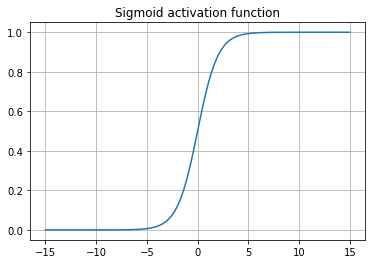

In [3]:
x = torch.linspace(-15, 15, 100)
plot_activation(x, torch.sigmoid(x), "Sigmoid")

### Tanh 
$$\tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x - e^{-x}}{e^{x} + e^{-x}}$$
$$= \frac{1 - e^{-2x}}{1 + e^{-2x}} = \frac{2 - (1 + e^{-2x})}{1 + e^{-2x}}$$
$$= 2\frac{1}{1 + e^{-2x}} - 1 = 2\sigma(2x) - 1$$

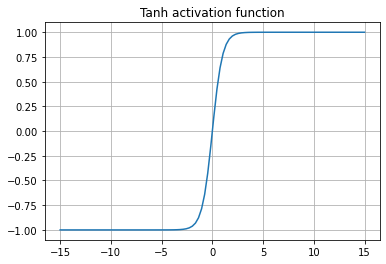

In [4]:
plot_activation(x, torch.tanh(x), "Tanh")

### Relu

$$relu(x) = \max(0, x)$$

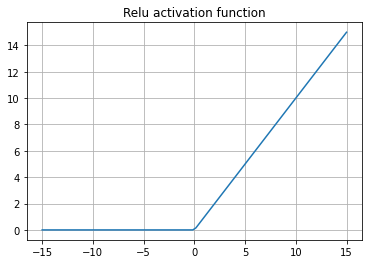

In [5]:
plot_activation(x, torch.relu(x), "Relu")

### Prelu

$$prelu(x) = \max(x, \alpha x)$$

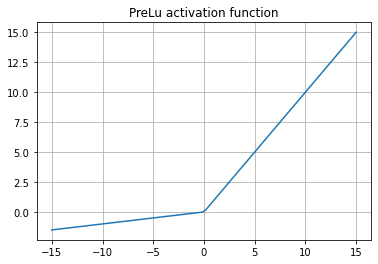

In [6]:
plot_activation(x, torch.prelu(x, torch.tensor(0.1)), "PreLu")

### Softmax

$$softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}}$$

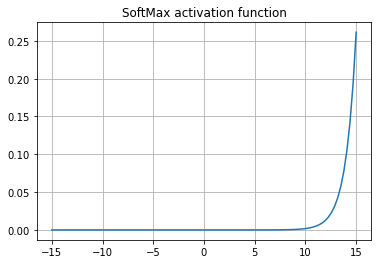

In [7]:
plot_activation(x, torch.softmax(x, dim=0), "SoftMax")

In [8]:
y_output = torch.softmax(torch.randn(1, 3), dim=1)
print(torch.randn(1, 3))
print(y_output)
print(y_output.sum(dim=1))

tensor([[-0.0564,  0.0879, -2.2904]])
tensor([[0.2668, 0.3272, 0.4061]])
tensor([1.])


## Loss Functions

### Mean Squared Error Loss

$$L_{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^{2}$$

For regression models

In [9]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.1793, grad_fn=<MseLossBackward>)


###  Categorical cross-entropy loss

For multi-class classification:

$$L_{ce}(y, \hat{y}) = -\sum_{j}y_j\log(\hat{y_j})$$

Pytorch cross entropy loss calculate the logsum of the softmax of the outputs and then the loss

In [10]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True) # 3 sample and 5 classes
targets = torch.tensor([1, 0, 3]) # each value is the target of each sample
loss = ce_loss(outputs, targets)
print(loss)

tensor(1.5536, grad_fn=<NllLossBackward>)


### Binary Cross-Entropy Loss

binary-class classification:
$$L(y,\hat{y}) = y_n\log(\hat{y_n}) + (1-y_n)\log(1-\hat{y_n})$$

In [11]:
bce_loss = nn.BCELoss()
probabilities = torch.sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.6401],
        [0.7633],
        [0.5327],
        [0.5088]], grad_fn=<SigmoidBackward>)
tensor(0.8069, grad_fn=<BinaryCrossEntropyBackward>)


## Supervised Training

Supervised Learning requires:

- A model
- A loss function
- Training data (pairs of observations and targets)
- Optimization Algorithms

In [12]:
import numpy as np
import seaborn as sns
seed = 1337
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

### Constructing toy data

In [13]:
def get_toy_data(means, devs, num_samples):
    """Generate toy data from a gaussian distributions
    Args:
        means (tuple): tuple of len 2 Specifying the means of
            the two sample distributions
        devs (tuple): tupe of len 2 specifying the deviations of
            the two sample distributions
        num_samples (int): num_samples for both samples distributions
    Return:
        data
    """
    x1_sample = torch.normal(means[0], devs[0], (num_samples, 2))
    x2_sample = torch.normal(means[1], devs[1], (num_samples, 2))
    data = torch.cat([x1_sample, x2_sample], dim=0)
    targets = torch.cat([torch.ones((num_samples, )), 
                         torch.zeros((num_samples, ))])
    # Shuffling data
    perm = torch.randperm(num_samples*2)
    data = data[perm]
    targets = targets[perm]
    return data, targets

In [14]:
def visualize_data(data, targets):
    """Visualize scatter plot of the data
    Args:
        data (torch.Tensor): tensor of shape (m, 2)
        targets (torch.Tensor): tensor of shape (m,)
    """
    fig = plt.figure(figsize=(8,4))
    sc = sns.scatterplot(x=data[:,0], y=data[:,1], style=targets.long(),
                        s=100)
    plt.title("Data Distribution Plot")
    plt.axis('off')
    plt.show()

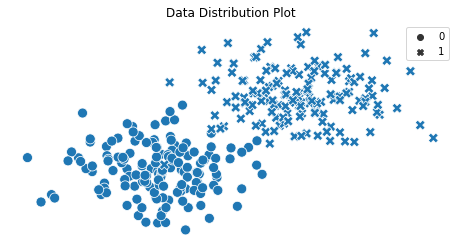

In [15]:
data, targets = get_toy_data((0, -3), (1, 1), 150)
visualize_data(data, targets)

### Simples Model Perceptron

In [16]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    """ A perceptron is one Linear layer"""
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        """The forward pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be
            (batch, ).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

### Training

In [17]:
# Get categorical accuracy from predictions
def binary_accuracy(preds, y):
    """Calculate the binary accuracy of the model
    Args:
        preds (torch.Tensor): outputs of the model
        y (torch.Tensor): real targets data
    Return:
        acc (torch.Tensor): scalar tensor representing
                the accuracy of the model
    """
    #round predictions to the closest integer
    preds = (preds > 0.5).float()
    correct = (preds == y).float() #convert into float for division
    acc = correct.sum()
    return acc

In [18]:
def gen_batches(data, targets, batch_size):
    """Function generator of batches
    Args:
        data (torch.Tensor): tensor of shape (m,2)
        targets (torch.Tensor): tensor of shape (m,)
    Yields:
        data_batch, targets_batch
    """
    for batch in range(0, data.shape[0], batch_size):
        yield data[batch:(batch+batch_size)], targets[batch:(batch+batch_size)]

In [90]:
# Train method
def train(model, data, targets, optimizer, criterion, batch_size):
    """Train the model
    Args:
        model (model): model module
        data (torch.Tensor): data tensor (mx2)
        targets (torch.Tensor): data target tensor (m,)
        optimizer (torch.Optim): optimizer instance
        criterion (loss): loss instance
        batch_size (int): int batch_size
    Returns:
        loss, acc (float, float): loss of the model, acc model 
    """
    epoch_loss = 0
    epoch_acc = 0
    # set the model in train mode
    model.train()
    
    for x_batch, y_batch in gen_batches(data, targets, batch_size):
        # reset gradients
        optimizer.zero_grad()
        # get predictions
        predictions = model(x_batch)
        # loss
        loss = criterion(predictions, y_batch)
        # get accuracy
        acc = binary_accuracy(predictions, y_batch)
        
        # backpropagate
        loss.backward()
        # Update weights
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    
    return epoch_loss/len(targets), epoch_acc/len(targets)

In [91]:
from IPython import display
plt.ion() # Allow live updates of plots

def get_axis_(data):
    minimum = torch.min(data[:,0]).item()
    maximum = torch.max(data[:,0]).item()
    x = torch.linspace(minimum, maximum, 100)
    return x

def display_(data, targets, model, title):
    plt.clf() # Live plots
    # Get intervals
    w = model.fc1.weight.data.squeeze(0)
    b = model.fc1.bias.data.squeeze(0)
    x = get_axis_(data)
    y = -(x*w[0]+b)/w[1]
    # Visual plots
    plt.title(title)
    plt.plot(x, y, linestyle='-')
    plt.scatter(data[:,0], data[:,1], c=targets)
    display.clear_output(wait=True)
    display.display(plt.gcf())

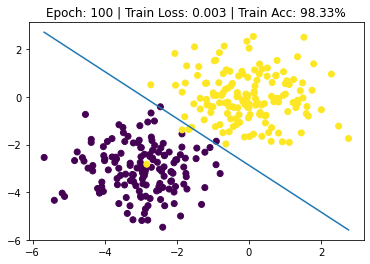

In [98]:
import torch.optim as optim
from tqdm.notebook import tqdm

INPUT_DIM = data.shape[1]
lr = 0.01

model_perceptron = Perceptron(INPUT_DIM)
bce_loss = nn.BCELoss() # Binary cross entropy loss
optimizer = optim.Adam(params=model_perceptron.parameters(), lr=lr)

N_EPOCHS = 100
losses = []
accuracies = []

for epoch in range(N_EPOCHS):
    # Train model
    train_loss, train_acc = train(model_perceptron, data, 
                                  targets, optimizer, 
                                  bce_loss, 20)
    # Save the losses of each phase
    losses.append(train_loss)
    # Save the accuracies of each phase
    accuracies.append(train_acc)
    title = f'Epoch: {epoch + 1} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%'
    display_(data, targets, model_perceptron, 
                title)
display.clear_output()

![convergence](assets/convergence.gif)